In [4]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler


In [5]:
Energy = pd.read_csv('renewable energy production (2).csv')
Energy

Date and Hour        Date StartHour   EndHour Source  \
0      2020-07-22 20:00:00+02:00  2020-07-22  20:00:00  21:00:00  Solar   
1      2020-07-23 07:00:00+02:00  2020-07-23  07:00:00  08:00:00  Solar   
2      2020-07-23 16:00:00+02:00  2020-07-23  16:00:00  17:00:00  Solar   
3      2020-07-23 19:00:00+02:00  2020-07-23  19:00:00  20:00:00  Solar   
4      2020-07-23 23:00:00+02:00  2020-07-23  23:00:00  24:00:00  Solar   
...                          ...         ...       ...       ...    ...   
59801  2023-06-30 06:00:00+02:00  2023-06-30  06:00:00  07:00:00  Solar   
59802  2023-06-30 13:00:00+02:00  2023-06-30  13:00:00  14:00:00  Solar   
59803  2023-06-30 14:00:00+02:00  2023-06-30  14:00:00  15:00:00  Solar   
59804  2023-06-30 16:00:00+02:00  2023-06-30  16:00:00  17:00:00  Solar   
59805  2023-06-30 18:00:00+02:00  2023-06-30  18:00:00  19:00:00  Solar   

       Production  dayOfYear    dayName monthName  
0           244.0        204  Wednesday      July  
1           223.0        205   Thursday      July  
2          2517.0        205   Thursday      July  
3           658.0        205   Thursday      July  
4             0.0        205   Thursday      July  
...           ...        ...        ...       ...  
59801        55.0        181     Friday      June  
59802      4554.0        181     Friday      June  
59803      4589.0        181     Friday      June  
59804      4173.0        181     Friday      June  
59805      2404.0        181     Friday      June  

[59806 rows x 9 columns]

In [6]:
# getting some informations about the dataset
Energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59806 entries, 0 to 59805
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date and Hour  59806 non-null  object 
 1   Date           59806 non-null  object 
 2   StartHour      59806 non-null  object 
 3   EndHour        59806 non-null  object 
 4   Source         59806 non-null  object 
 5   Production     59804 non-null  float64
 6   dayOfYear      59806 non-null  int64  
 7   dayName        59806 non-null  object 
 8   monthName      59806 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 4.1+ MB


In [7]:
# statistical Measures of the dataset
Energy.describe()

Production     dayOfYear
count  59804.000000  59806.000000
mean    2792.859775    172.454720
std     3190.239316    104.937607
min        0.000000      1.000000
25%       42.000000     84.000000
50%     1871.000000    164.000000
75%     4053.250000    262.000000
max    17220.000000    366.000000

In [8]:
Energy['Source'].value_counts()

Wind     29904
Solar    29902
Name: Source, dtype: int64

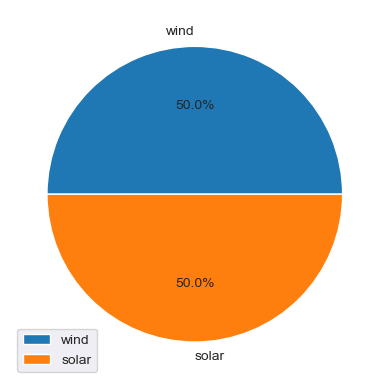

In [9]:
y=Energy ['Source'].value_counts()
labels=['wind','solar']
plt.pie(y,labels=labels,autopct='%1.1f%%')
plt.legend(loc='lower left')
plt.show()

<Axes: >

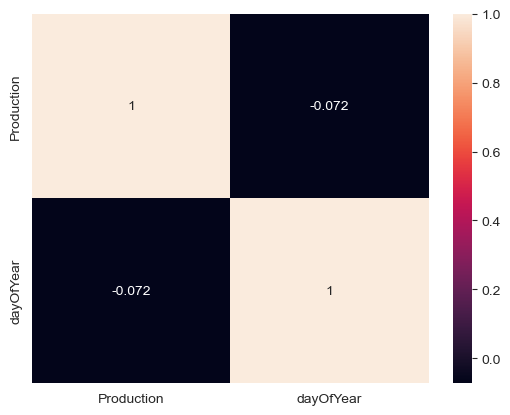

In [10]:
sns.heatmap(Energy.corr(),annot=True)

In [11]:
Energy ['Date'] = pd.to_datetime(Energy ['Date'])
# Extract the year
Energy ['Year'] = Energy ['Date'].dt.year

In [12]:
a1=Energy .groupby('dayName')['Production'].sum().reset_index()
a1

dayName  Production
0     Friday  24124769.0
1     Monday  24108872.0
2   Saturday  23875750.0
3     Sunday  24092365.0
4   Thursday  23656249.0
5    Tuesday  23903980.0
6  Wednesday  23262201.0

In [13]:
#plotting time series graph of source wind with year, month, day etc
fig = go.Figure([go.Scatter(x=a1['dayName'], y=a1['Production'],line=dict(color='green', width=2))])
fig.update_layout(title='Time Series Graph of daywise production of Electricity using wind',
                  xaxis_title='Days',  # Set the x-axis label
                  yaxis_title='Production')
fig.show()

In [14]:
a2=Energy.groupby('monthName')['Production'].sum().reset_index()
a2

monthName  Production
0       April  16479230.0
1      August   9440098.0
2    December  14208438.0
3    February  20840134.0
4     January  18535117.0
5        July   9672909.0
6        June  11874777.0
7       March  15360030.0
8         May  16915969.0
9    November  11915151.0
10    October  13204745.0
11  September   8577588.0

In [15]:
import plotly.graph_objects as go
fig = go.Figure([go.Scatter(x=a2['monthName'], y=a2['Production'],line=dict(color='green', width=2))])
fig.update_layout(title='Time Series Graph of Monthwise production of Electricity using wind',
                  xaxis_title='Months',  # Set the x-axis label
                  yaxis_title='Production')
fig.show()

In [16]:
a3=Energy.groupby('Year')['Production'].sum().reset_index()
a3

Year  Production
0  2020  41762887.0
1  2021  44747217.0
2  2022  49501353.0
3  2023  31012729.0

In [17]:
#yearwise plotting
import plotly.graph_objects as go
fig = go.Figure([go.Scatter(x=a3['Year'], y=a3['Production'],line=dict(color='green', width=2))])
fig.update_layout(title='Time Series Graph of Yearwise production of Electricity using wind',
                  xaxis_title='Years',  # Set the x-axis label
                  yaxis_title='Production')
fig.show()

**Data Cleaning and preprocessing**

In [18]:
# Fill missing values with mean
Energy.fillna(Energy.mean(), inplace=True)
Energy

Date and Hour       Date StartHour   EndHour Source  \
0      2020-07-22 20:00:00+02:00 2020-07-22  20:00:00  21:00:00  Solar   
1      2020-07-23 07:00:00+02:00 2020-07-23  07:00:00  08:00:00  Solar   
2      2020-07-23 16:00:00+02:00 2020-07-23  16:00:00  17:00:00  Solar   
3      2020-07-23 19:00:00+02:00 2020-07-23  19:00:00  20:00:00  Solar   
4      2020-07-23 23:00:00+02:00 2020-07-23  23:00:00  24:00:00  Solar   
...                          ...        ...       ...       ...    ...   
59801  2023-06-30 06:00:00+02:00 2023-06-30  06:00:00  07:00:00  Solar   
59802  2023-06-30 13:00:00+02:00 2023-06-30  13:00:00  14:00:00  Solar   
59803  2023-06-30 14:00:00+02:00 2023-06-30  14:00:00  15:00:00  Solar   
59804  2023-06-30 16:00:00+02:00 2023-06-30  16:00:00  17:00:00  Solar   
59805  2023-06-30 18:00:00+02:00 2023-06-30  18:00:00  19:00:00  Solar   

       Production  dayOfYear    dayName monthName  Year  
0           244.0        204  Wednesday      July  2020  
1           223.0        205   Thursday      July  2020  
2          2517.0        205   Thursday      July  2020  
3           658.0        205   Thursday      July  2020  
4             0.0        205   Thursday      July  2020  
...           ...        ...        ...       ...   ...  
59801        55.0        181     Friday      June  2023  
59802      4554.0        181     Friday      June  2023  
59803      4589.0        181     Friday      June  2023  
59804      4173.0        181     Friday      June  2023  
59805      2404.0        181     Friday      June  2023  

[59806 rows x 10 columns]

In [19]:
# Droping 'Date and Hour' column
Energy.drop(columns=["Date and Hour"])

Date StartHour   EndHour Source  Production  dayOfYear    dayName  \
0     2020-07-22  20:00:00  21:00:00  Solar       244.0        204  Wednesday   
1     2020-07-23  07:00:00  08:00:00  Solar       223.0        205   Thursday   
2     2020-07-23  16:00:00  17:00:00  Solar      2517.0        205   Thursday   
3     2020-07-23  19:00:00  20:00:00  Solar       658.0        205   Thursday   
4     2020-07-23  23:00:00  24:00:00  Solar         0.0        205   Thursday   
...          ...       ...       ...    ...         ...        ...        ...   
59801 2023-06-30  06:00:00  07:00:00  Solar        55.0        181     Friday   
59802 2023-06-30  13:00:00  14:00:00  Solar      4554.0        181     Friday   
59803 2023-06-30  14:00:00  15:00:00  Solar      4589.0        181     Friday   
59804 2023-06-30  16:00:00  17:00:00  Solar      4173.0        181     Friday   
59805 2023-06-30  18:00:00  19:00:00  Solar      2404.0        181     Friday   

      monthName  Year  
0          July  2020  
1          July  2020  
2          July  2020  
3          July  2020  
4          July  2020  
...         ...   ...  
59801      June  2023  
59802      June  2023  
59803      June  2023  
59804      June  2023  
59805      June  2023  

[59806 rows x 9 columns]

In [20]:
Energy.dtypes

Date and Hour            object
Date             datetime64[ns]
StartHour                object
EndHour                  object
Source                   object
Production              float64
dayOfYear                 int64
dayName                  object
monthName                object
Year                      int64
dtype: object

In [21]:
# sorting the data based on the date and working hour

Energy = Energy .sort_values(by=["Date","StartHour"])
Energy  = Energy .reindex(list(range(len(Energy))))
Energy .isnull().sum()

Date and Hour    0
Date             0
StartHour        0
EndHour          0
Source           0
Production       0
dayOfYear        0
dayName          0
monthName        0
Year             0
dtype: int64

In [22]:

null_rows = Energy [Energy .isnull().any(axis=1)]
null_rows

Empty DataFrame
Columns: [Date and Hour, Date, StartHour, EndHour, Source, Production, dayOfYear, dayName, monthName, Year]
Index: []

**Data Visualization**


1. Yearly Energy Production

In [23]:
Energy ['Date'] = pd.to_datetime(Energy ['Date'])
# Extract the year
Energy ['Year'] = Energy ['Date'].dt.year

# Display the 'Year' column
print(Energy ['Year'])
yearly_production = Energy.groupby(by=["Source","Year"]).Production.sum().reset_index()
yearly_production

0        2020
1        2020
2        2020
3        2020
4        2020
         ... 
59801    2023
59802    2023
59803    2023
59804    2023
59805    2023
Name: Year, Length: 59806, dtype: int64


Source  Year    Production
0  Solar  2020  6.389965e+06
1  Solar  2021  8.323800e+06
2  Solar  2022  1.094208e+07
3  Solar  2023  6.307001e+06
4   Wind  2020  3.537292e+07
5   Wind  2021  3.642342e+07
6   Wind  2022  3.856486e+07
7   Wind  2023  2.470573e+07

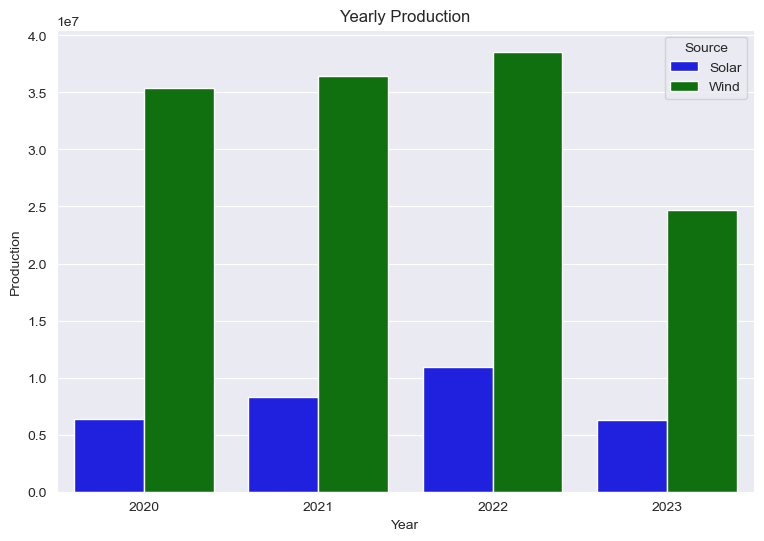

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
Bar_colors = ['blue', 'green', 'red']
plt.figure(figsize=(9, 6))
sns.barplot(data=yearly_production, x="Year", y="Production", hue="Source", palette = Bar_colors)
plt.title("Yearly Production")
plt.xlabel("Year")
plt.ylabel("Production")
plt.show()

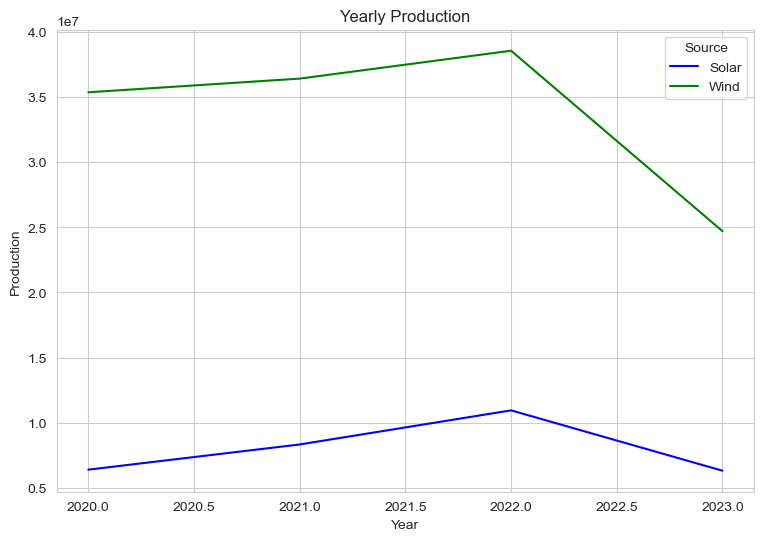

In [25]:
sns.set_style("whitegrid")


line_colors = ['blue', 'green', 'red']

plt.figure(figsize=(9, 6))
sns.lineplot(data=yearly_production, x="Year", y="Production", hue="Source", palette=line_colors)

plt.title("Yearly Production")
plt.xlabel("Year")
plt.ylabel("Production")
plt.show()

2. Monthly Energy Production in Every Year

In [26]:
month_order = {"JEnergy nuEnergy ry": 1, "FebruEnergy ry": 2, "MEnergy rch": 3, "Energy pril": 4, "MEnergy y": 5, "June": 6, "July": 7,
               "Energy ugust": 8, "September": 9, "October": 10, "November": 11, "December": 12}

In [27]:
year_month_production = Energy .groupby(by=["Source", "Year", "monthName"]).Production.sum().reset_index()
# sorting values based on the months
year_month_production = year_month_production.sort_values(by="monthName", key=lambda x: x.map({m: i for i, m in enumerate(month_order)}))

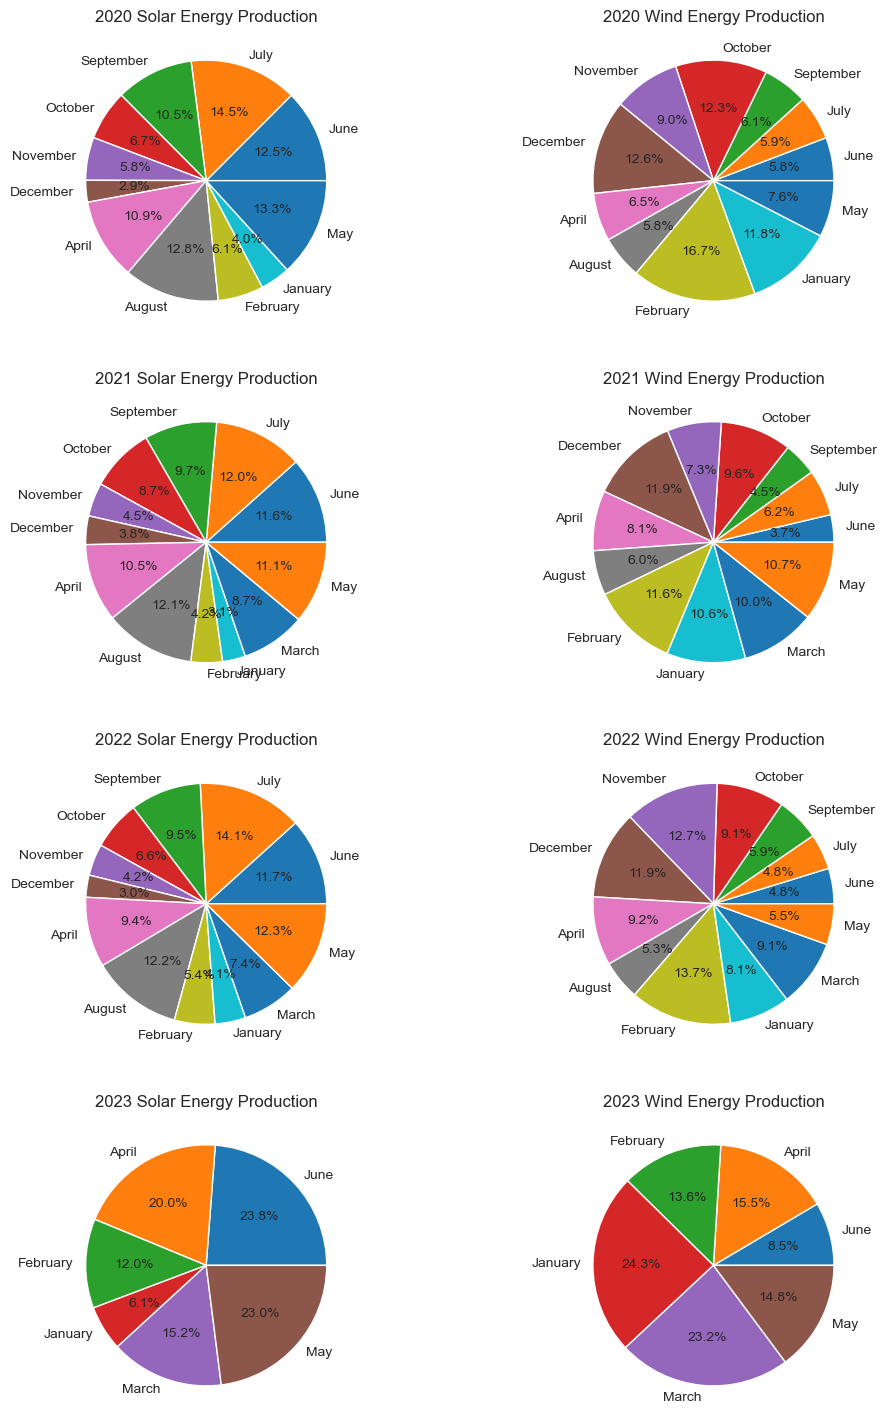

In [28]:
years = sorted(year_month_production.Year.unique())

plt.figure(figsize=(12, 18))
plt.subplot(4, 2, 8)

for i, year in enumerate(years):

    months = year_month_production[year_month_production.Year == year].monthName.unique()
    plt.subplot(4, 2, i*2 + 1)

    rule = lambda x: x[x.Year == year][x.Source == "Solar"]
    X_solar = rule(year_month_production).Production
    plt.pie(X_solar, labels=months, autopct='%1.1f%%')
    plt.title(f"{year} Solar Energy Production")

    plt.subplot(4, 2, i*2 + 2)

    rule = lambda x: x[x.Year == year][x.Source == "Wind"]
    X_wind = rule(year_month_production).Production
    plt.pie(X_wind, labels=months, autopct='%1.1f%%')
    plt.title(f"{year} Wind Energy Production")

plt.show()

3. Daily Energy Production

In [29]:
daily_production = Energy .groupby(by=["Source","Date"]).Production.sum().reset_index()
daily_production["Date"] = pd.to_datetime(daily_production["Date"])

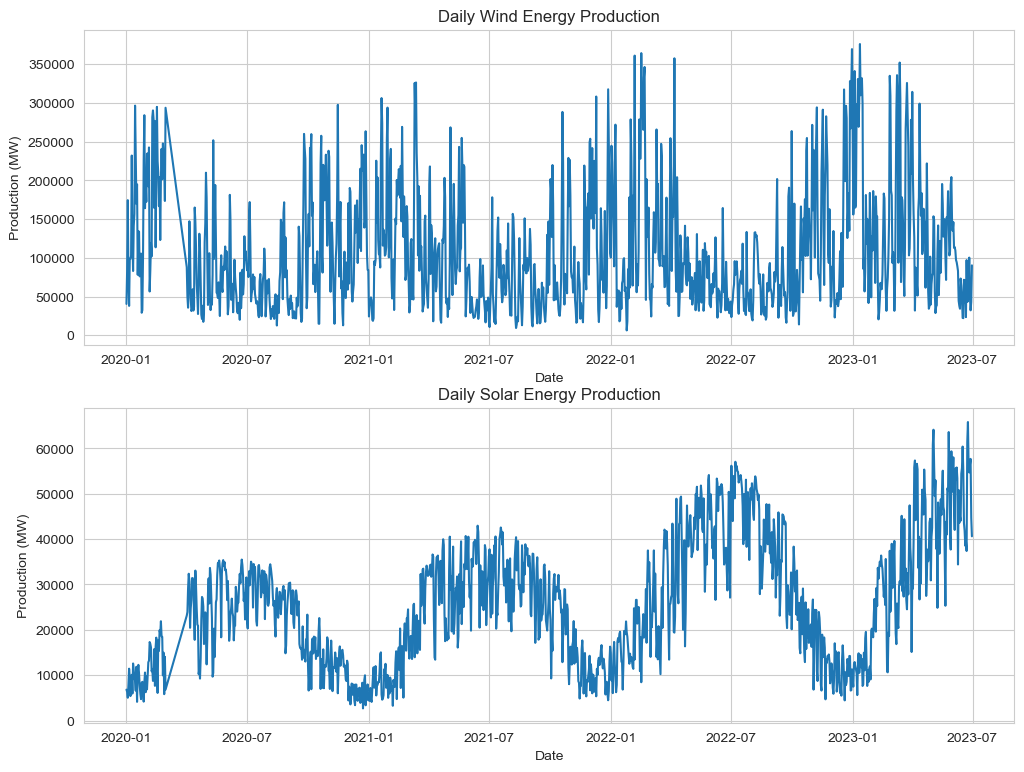

In [30]:
sns.set_style("whitegrid")
plt.figure(figsize=(12, 9))

plt.subplot(2, 1, 2)

plt.subplot(2, 1, 1)
Color = ['red','green']
Col= ['black']
plt.title("Daily Wind Energy Production")
sns.lineplot(data=daily_production[daily_production.Source=="Wind"], x="Date", y="Production",palette = Color)
plt.xlabel("Date")
plt.ylabel("Production (MW)")

plt.subplot(2, 1, 2)
plt.title("Daily Solar Energy Production")
sns.lineplot(data=daily_production[daily_production.Source=="Solar"], x="Date", y="Production",palette = Col)
plt.xlabel("Date")
plt.ylabel("Production (MW)")

plt.show()

In [31]:
# encoding solar column
Energy .replace({'Source':{'Solar':1,'Wind':2}}, inplace=True)

3 # encoding 'monthName' column
Energy .replace({'monthName':{'January':0,'February':1,'March':2,'April':3,'May':4,'June':5,'July':6,'August':7,
                              'September':8,'October':9,'November':10,'December':11}}, inplace=True)
Energy


Date and Hour       Date StartHour   EndHour  Source  \
0      2020-07-22 20:00:00+02:00 2020-07-22  20:00:00  21:00:00       1   
1      2020-07-23 07:00:00+02:00 2020-07-23  07:00:00  08:00:00       1   
2      2020-07-23 16:00:00+02:00 2020-07-23  16:00:00  17:00:00       1   
3      2020-07-23 19:00:00+02:00 2020-07-23  19:00:00  20:00:00       1   
4      2020-07-23 23:00:00+02:00 2020-07-23  23:00:00  24:00:00       1   
...                          ...        ...       ...       ...     ...   
59801  2023-06-30 06:00:00+02:00 2023-06-30  06:00:00  07:00:00       1   
59802  2023-06-30 13:00:00+02:00 2023-06-30  13:00:00  14:00:00       1   
59803  2023-06-30 14:00:00+02:00 2023-06-30  14:00:00  15:00:00       1   
59804  2023-06-30 16:00:00+02:00 2023-06-30  16:00:00  17:00:00       1   
59805  2023-06-30 18:00:00+02:00 2023-06-30  18:00:00  19:00:00       1   

       Production  dayOfYear    dayName  monthName  Year  
0           244.0        204  Wednesday          6  2020  
1           223.0        205   Thursday          6  2020  
2          2517.0        205   Thursday          6  2020  
3           658.0        205   Thursday          6  2020  
4             0.0        205   Thursday          6  2020  
...           ...        ...        ...        ...   ...  
59801        55.0        181     Friday          5  2023  
59802      4554.0        181     Friday          5  2023  
59803      4589.0        181     Friday          5  2023  
59804      4173.0        181     Friday          5  2023  
59805      2404.0        181     Friday          5  2023  

[59806 rows x 10 columns]

**Model Building**

In [32]:
# Splitting the data into training and testing sets
X = Energy[['Source','monthName','dayOfYear','Year']] # Features
y = Energy['Production']  # Target variable


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [34]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
model

DecisionTreeRegressor()

In [35]:
predictions = model.predict(X_test)
predictions

array([1043.47619048,  290.36842105, 5024.3125    , ..., 1893.375     ,
        543.10526316, 2220.58823529])

In [36]:
mae = mean_absolute_error(y_test, predictions)
print('Mean Absolute Error:', mae)

Mean Absolute Error: 1165.3173223169774


In [37]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, predictions)
print('R-squared (R2) Score:', r2)


R-squared (R2) Score: 0.7847674176038474


In [38]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions)
print('Mean Squared Error (MSE):', mse)


Mean Squared Error (MSE): 2259454.7879682775


In [39]:
real_time_data = [[2,8,75,2035]]

In [40]:
# Predictions for real-time data
real_time_predictions = model.predict(real_time_data)
Solar = 1
Wind = 2
# Print the predictions
def energy_predictions():
      if real_time_data[0][0] == 1:
          print('Predicted Solar Energy Production for Real-Time Data:  ',real_time_predictions)
      elif real_time_data[0][0] == 2:
          print('Predicted Wind Energy Production for Real-Time Data:  ',real_time_predictions)
      else:
          print('Unknown Energy Source. Cannot provide predictions.')
energy_predictions()
# Indicate if there's less or more production
average_production = y_train.mean()  # Use the average production from the training data

for prediction in real_time_predictions:
    if prediction < average_production:
        print('Less production - Kindly Minimize the supply')

    elif prediction > average_production:
        print('More production - Store more for low production seasons.')

    else:
        print('Production is average - Balance the supply and storage')

# Adjust energy supply based on the area's production
# This part would involve actions specific to your application, such as controlling energy supply based on production levels.
# It depends on the context and what actions you need to take based on the predicted production levels.


Predicted Wind Energy Production for Real-Time Data:   [7284.16666667]
More production - Store more for low production seasons.


In [41]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate MAE, MSE, RMSE, and R2
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

print('Mean Absolute Error (MAE):', mae)
print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)
print('R-squared (R2) Score:', r2)


Mean Absolute Error (MAE): 1165.3173223169774
Mean Squared Error (MSE): 2259454.7879682775
Root Mean Squared Error (RMSE): 1503.1482920750957
R-squared (R2) Score: 0.7847674176038474


In [42]:
from sklearn.ensemble import RandomForestRegressor

random_forest_model = RandomForestRegressor(random_state=42)
random_forest_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [43]:
# Predictions
predictions = random_forest_model.predict(X_test)

# Calculate evaluation metrics
rf_mae = mean_absolute_error(y_test, predictions)
rf_mse = mean_squared_error(y_test, predictions)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(y_test,predictions)

print('Random Forest Metrics:')
print('Mean Absolute Error (MAE):', rf_mae)
print('Mean Squared Error (MSE):', rf_mse)
print('Root Mean Squared Error (RMSE):', rf_rmse)
print('R-squared (R2) Score:', rf_r2)

Random Forest Metrics:
Mean Absolute Error (MAE): 1165.3490673826923
Mean Squared Error (MSE): 2260340.4756921595
Root Mean Squared Error (RMSE): 1503.442874103356
R-squared (R2) Score: 0.7846830481988817


In [44]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Create and train the XGBoost model
xgb_model = xgb.XGBRegressor(objective ='reg:squarederror', random_state=42)  # for regression
xgb_model.fit(X_train, y_train)

# Predictions
xgb_predictions = xgb_model.predict(X_test)

# Calculate evaluation metrics
xgb_mae = mean_absolute_error(y_test, xgb_predictions)
xgb_mse = mean_squared_error(y_test, xgb_predictions)
xgb_rmse = np.sqrt(xgb_mse)
xgb_r2 = r2_score(y_test, xgb_predictions)

print('XGBoost Metrics:')
print('Mean Absolute Error (MAE):', xgb_mae)
print('Mean Squared Error (MSE):', xgb_mse)
print('Root Mean Squared Error (RMSE):', xgb_rmse)
print('R-squared (R2) Score:', xgb_r2)


XGBoost Metrics:
Mean Absolute Error (MAE): 1282.4225592396933
Mean Squared Error (MSE): 2650346.9505842286
Root Mean Squared Error (RMSE): 1627.9886211470364
R-squared (R2) Score: 0.7475315631639801


In [48]:
from sklearn.neighbors import KNeighborsRegressor

# Create and train the KNN model
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Predictions
knn_predictions = knn_model.predict(X_test)

# Calculate evaluation metrics for KNN
knn_mae = mean_absolute_error(y_test, knn_predictions)
knn_mse = mean_squared_error(y_test, knn_predictions)
knn_rmse = np.sqrt(knn_mse)
knn_r2 = r2_score(y_test, knn_predictions)

#)

# Print the metrics for KNN
print('KNN Metrics:')
print('Mean Absolute Error (MAE):', knn_mae)
print('Mean Squared Error (MSE):', knn_mse)
print('Root Mean Squared Error (RMSE):', knn_rmse)
print('R-squared (R2) Score:', knn_r2)


KNN Metrics:
Mean Absolute Error (MAE): 1211.713012855314
Mean Squared Error (MSE): 2603420.953483489
Root Mean Squared Error (RMSE): 1613.5119935976581
R-squared (R2) Score: 0.7520016696654643


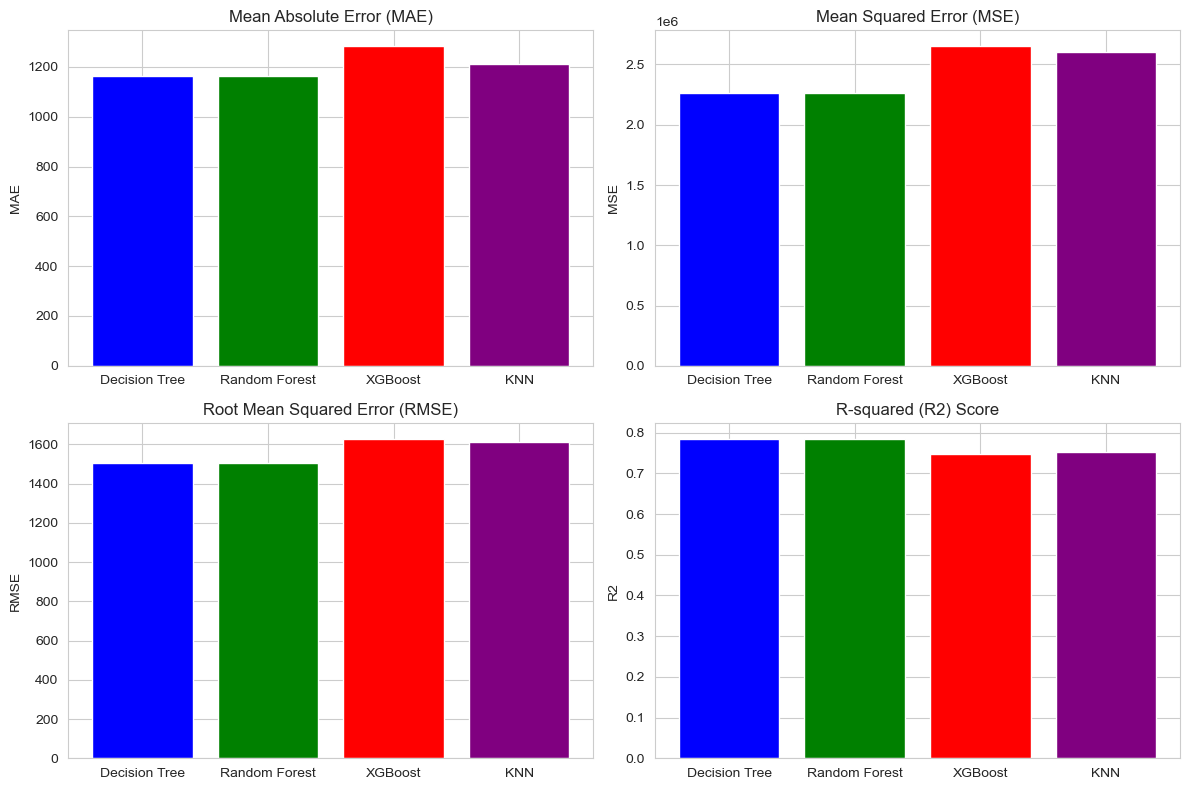

In [49]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have calculated MAE, MSE, RMSE, R2 for each algorithm and stored them in lists
mae_scores = [mae, rf_mae, xgb_mae, knn_mae]
mse_scores = [mse, rf_mse, xgb_mse, knn_mse]
rmse_scores = [rmse, rf_rmse, xgb_rmse, knn_rmse]
r2_scores = [r2, rf_r2, xgb_r2, knn_r2]

# Algorithms
algorithms = ['Decision Tree', 'Random Forest', 'XGBoost', 'KNN']

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
fig.subplots_adjust(hspace=0.5)

# MAE comparison
axes[0, 0].bar(algorithms, mae_scores, color=['blue', 'green', 'red', 'purple'])
axes[0, 0].set_title('Mean Absolute Error (MAE)')
axes[0, 0].set_ylabel('MAE')

# MSE comparison
axes[0, 1].bar(algorithms, mse_scores, color=['blue', 'green', 'red', 'purple'])
axes[0, 1].set_title('Mean Squared Error (MSE)')
axes[0, 1].set_ylabel('MSE')

# RMSE comparison
axes[1, 0].bar(algorithms, rmse_scores, color=['blue', 'green', 'red', 'purple'])
axes[1, 0].set_title('Root Mean Squared Error (RMSE)')
axes[1, 0].set_ylabel('RMSE')

# R2 comparison
axes[1, 1].bar(algorithms, r2_scores, color=['blue', 'green', 'red', 'purple'])
axes[1, 1].set_title('R-squared (R2) Score')
axes[1, 1].set_ylabel('R2')

# Display the plot
plt.tight_layout()
plt.show()


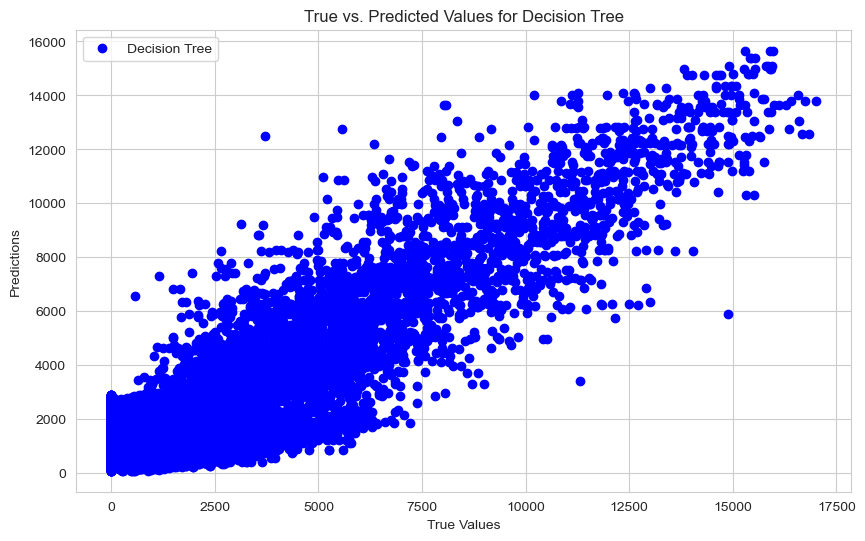

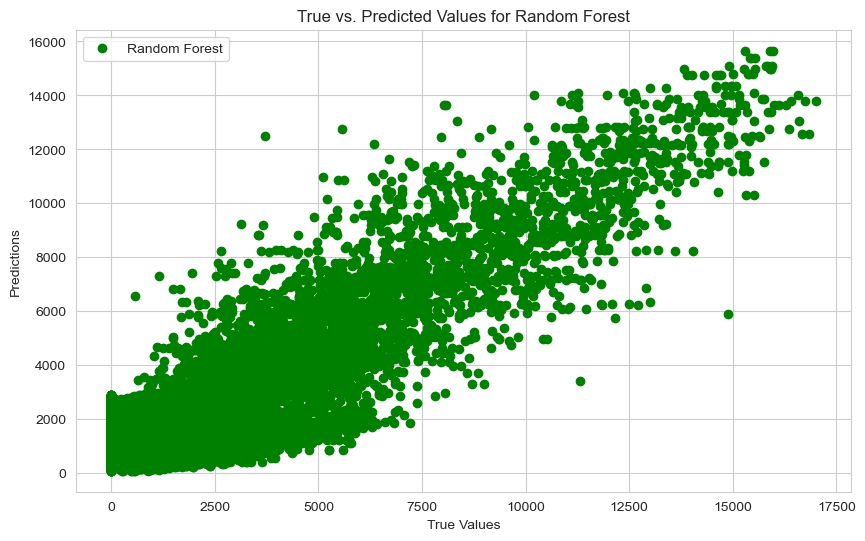

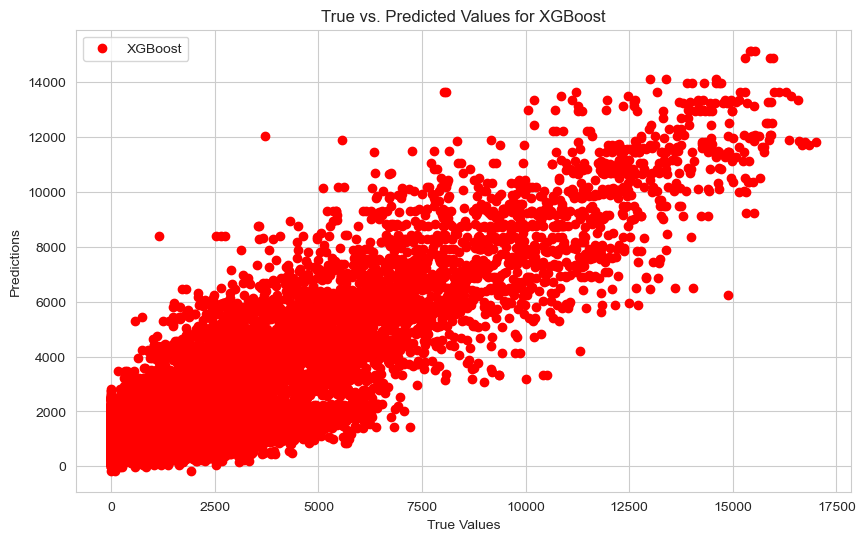

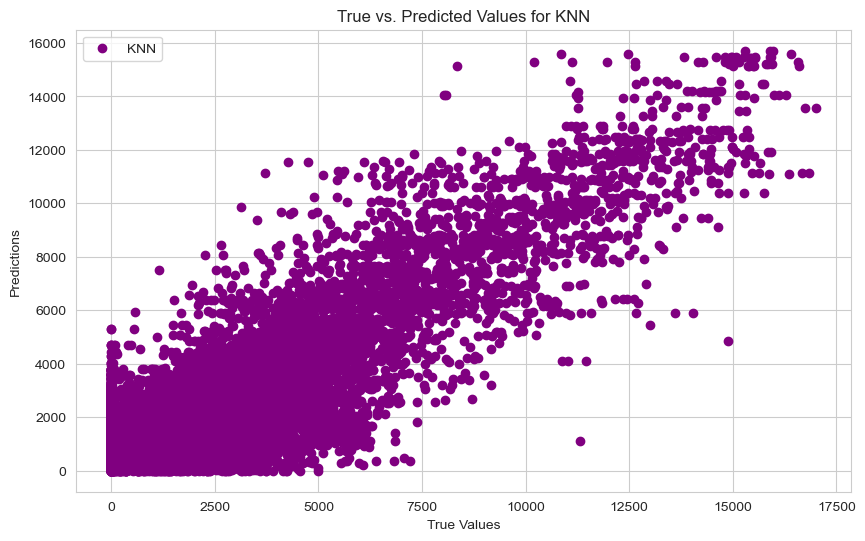

In [50]:
# Assuming you have the true labels (y_test) and predictions for each model
# Replace these with the correct predictions and true labels for each algorithm

# Scatter plot for Decision Tree
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, color='blue', label='Decision Tree')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs. Predicted Values for Decision Tree')
plt.legend()
plt.show()

# Scatter plot for Random Forest
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, color='green', label='Random Forest')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs. Predicted Values for Random Forest')
plt.legend()
plt.show()

# Scatter plot for XGBoost
plt.figure(figsize=(10, 6))
plt.scatter(y_test, xgb_predictions, color='red', label='XGBoost')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs. Predicted Values for XGBoost')
plt.legend()
plt.show()

# Scatter plot for KNN
plt.figure(figsize=(10, 6))
plt.scatter(y_test, knn_predictions, color='purple', label='KNN')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs. Predicted Values for KNN')
plt.legend()
plt.show()




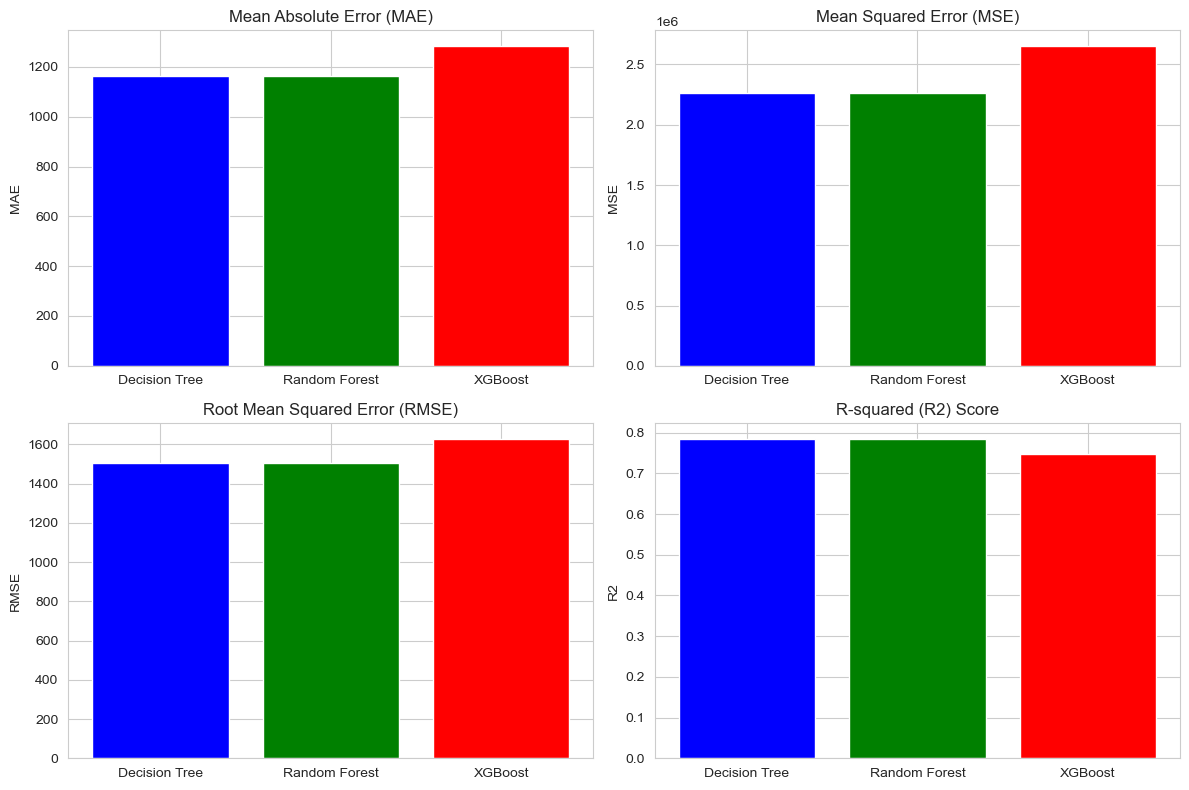

In [51]:
import matplotlib.pyplot as plt

# Calculate MAE, MSE, RMSE, and R2 for each model
mae_scores = [mae, rf_mae, xgb_mae]
mse_scores = [mse, rf_mse, xgb_mse]
rmse_scores = [rmse, rf_rmse, xgb_rmse]
r2_scores = [r2, rf_r2, xgb_r2]

# Algorithms
algorithms = ['Decision Tree', 'Random Forest', 'XGBoost']

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
fig.subplots_adjust(hspace=0.5)

# MAE comparison
axes[0, 0].bar(algorithms, mae_scores, color=['blue', 'green', 'red'])
axes[0, 0].set_title('Mean Absolute Error (MAE)')
axes[0, 0].set_ylabel('MAE')

# MSE comparison
axes[0, 1].bar(algorithms, mse_scores, color=['blue', 'green', 'red'])
axes[0, 1].set_title('Mean Squared Error (MSE)')
axes[0, 1].set_ylabel('MSE')

# RMSE comparison
axes[1, 0].bar(algorithms, rmse_scores, color=['blue', 'green', 'red'])
axes[1, 0].set_title('Root Mean Squared Error (RMSE)')
axes[1, 0].set_ylabel('RMSE')

# R2 comparison
axes[1, 1].bar(algorithms, r2_scores, color=['blue', 'green', 'red'])
axes[1, 1].set_title('R-squared (R2) Score')
axes[1, 1].set_ylabel('R2')

# Display the plot
plt.tight_layout()
plt.show()


In [52]:
# List of R-squared scores for each algorithm
r2_scores = [r2, rf_r2, xgb_r2, knn_r2]

# List of algorithm names
algorithms = ['Decision Tree', 'Random Forest', 'XGBoost', 'KNN']

# Find the index of the algorithm with the maximum R-squared score
most_accurate_index = np.argmax(r2_scores)

# Get the most accurate algorithm and its R-squared score
most_accurate_algorithm = algorithms[most_accurate_index]
most_accurate_r2_score = r2_scores[most_accurate_index]

# Print the most accurate algorithm and its R-squared score
print('The most accurate algorithm is:', most_accurate_algorithm)
print('R-squared (R2) Score:', most_accurate_r2_score * 100,'%')


The most accurate algorithm is: Decision Tree
R-squared (R2) Score: 78.47674176038474 %


In [54]:
import joblib

joblib.dump(model, 'renewable_energy_model.pkl')

['renewable_energy_model.pkl']